# ML Mini project - Car price prediction

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the csv file using pd 

In [2]:
vehicles = pd.read_csv(r"C:\Users\tania\Desktop\CAR DETAILS FROM CAR DEKHO.csv")

The first 5 rows of the dataframe 

In [3]:
vehicles.head()

,Name,Year,Selling_price,Present_price,Km_driven,Fuel_type,Seller_type,Transmission,Owner_type
0,Maruti 800 AC,2007,60000,90050.0,70000,Petrol,Individual,Manual,1
1,Maruti Wagon R LXI Minor,2007,135000,2202550.0,50000,Petrol,Individual,Manual,1
2,Hyundai Xcent 1.2 Kappa S,2016,Ask for price,825050.0,25000,Petrol,Individual,Manual,1
3,Hyundai Verna 1.6 SX,2012,600000,959950.0,100000,Diesel,Individual,Manual,1
4,Datsun RediGO T Option,2017,250000,575050.0,46000,Petrol,Individual,Manual,1


### Data Understanding and Exploration

In [4]:
#Data Inspection
# i. We need to change Selling_price column to int datatype
# ii. Selling_price column has inconsistent entry "Ask for price"
# iii. Car name column has too many words, we will keep only first two words
# iv.The dataset has no NaN or null value

In [5]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           4340 non-null   object 
 1   Year           4340 non-null   int64  
 2   Selling_price  4340 non-null   object 
 3   Present_price  4340 non-null   float64
 4   Km_driven      4340 non-null   int64  
 5   Fuel_type      4340 non-null   object 
 6   Seller_type    4340 non-null   object 
 7   Transmission   4340 non-null   object 
 8   Owner_type     4340 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 305.3+ KB


In [6]:
vehicles.shape

(4340, 9)

In [7]:
vehicles['Year'].unique()

array([2007, 2016, 2012, 2017, 2014, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992], dtype=int64)

In [8]:
vehicles['Seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

In [9]:
vehicles['Owner_type'].unique()

array([1, 2, 3], dtype=int64)

In [10]:
vehicles['Selling_price'].unique()

array(['60000', '135000', 'Ask for price', ..., '108000', '865000',
       '225000'], dtype=object)

In [11]:
vehicles[vehicles['Selling_price']!='Ask for price']

,Name,Year,Selling_price,Present_price,Km_driven,Fuel_type,Seller_type,Transmission,Owner_type
0,Maruti 800 AC,2007,60000,90050.0,70000,Petrol,Individual,Manual,1
1,Maruti Wagon R LXI Minor,2007,135000,2202550.0,50000,Petrol,Individual,Manual,1
3,Hyundai Verna 1.6 SX,2012,600000,959950.0,100000,Diesel,Individual,Manual,1
4,Datsun RediGO T Option,2017,250000,575050.0,46000,Petrol,Individual,Manual,1
5,Honda Amaze VX i-DTEC,2014,450000,675050.0,141000,Diesel,Individual,Manual,2
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,407999,616998.5,80000,Diesel,Individual,Manual,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,407999,616998.5,80000,Diesel,Individual,Manual,2
4337,Maruti 800 AC BSIII,2009,108000,167000.0,83000,Petrol,Individual,Manual,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,1297500.0,90000,Diesel,Individual,Manual,1


In [12]:
vehicles=vehicles[vehicles['Selling_price']!='Ask for price']

In [13]:
vehicles['Selling_price']=vehicles['Selling_price'].astype(int)

In [14]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           4339 non-null   object 
 1   Year           4339 non-null   int64  
 2   Selling_price  4339 non-null   int32  
 3   Present_price  4339 non-null   float64
 4   Km_driven      4339 non-null   int64  
 5   Fuel_type      4339 non-null   object 
 6   Seller_type    4339 non-null   object 
 7   Transmission   4339 non-null   object 
 8   Owner_type     4339 non-null   int64  
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 322.0+ KB


In [15]:
vehicles.isnull().sum()

Name             0
Year             0
Selling_price    0
Present_price    0
Km_driven        0
Fuel_type        0
Seller_type      0
Transmission     0
Owner_type       0
dtype: int64

Looking at the result of the above query it seems clear we have no null values in our dataset!

In [16]:
vehicles['Name']

0                             Maruti 800 AC
1                  Maruti Wagon R LXI Minor
3                      Hyundai Verna 1.6 SX
4                    Datsun RediGO T Option
5                     Honda Amaze VX i-DTEC
                       ...                 
4335    Hyundai i20 Magna 1.4 CRDi (Diesel)
4336             Hyundai i20 Magna 1.4 CRDi
4337                    Maruti 800 AC BSIII
4338       Hyundai Creta 1.6 CRDi SX Option
4339                       Renault KWID RXT
Name: Name, Length: 4339, dtype: object

In [17]:
vehicles['Name'].str.split()

0                                [Maruti, 800, AC]
1                   [Maruti, Wagon, R, LXI, Minor]
3                        [Hyundai, Verna, 1.6, SX]
4                      [Datsun, RediGO, T, Option]
5                       [Honda, Amaze, VX, i-DTEC]
                           ...                    
4335    [Hyundai, i20, Magna, 1.4, CRDi, (Diesel)]
4336              [Hyundai, i20, Magna, 1.4, CRDi]
4337                      [Maruti, 800, AC, BSIII]
4338       [Hyundai, Creta, 1.6, CRDi, SX, Option]
4339                          [Renault, KWID, RXT]
Name: Name, Length: 4339, dtype: object

In [18]:
vehicles['Name'].str.split().str.slice(start=0,stop=2).str.join(' ')

0          Maruti 800
1        Maruti Wagon
3       Hyundai Verna
4       Datsun RediGO
5         Honda Amaze
            ...      
4335      Hyundai i20
4336      Hyundai i20
4337       Maruti 800
4338    Hyundai Creta
4339     Renault KWID
Name: Name, Length: 4339, dtype: object

In [19]:
vehicles['Name']=vehicles['Name'].str.split().str.slice(start=0,stop=2).str.join(' ')

Reset Index

In [20]:
vehicles.reset_index(drop=True)

,Name,Year,Selling_price,Present_price,Km_driven,Fuel_type,Seller_type,Transmission,Owner_type
0,Maruti 800,2007,60000,90050.0,70000,Petrol,Individual,Manual,1
1,Maruti Wagon,2007,135000,2202550.0,50000,Petrol,Individual,Manual,1
2,Hyundai Verna,2012,600000,959950.0,100000,Diesel,Individual,Manual,1
3,Datsun RediGO,2017,250000,575050.0,46000,Petrol,Individual,Manual,1
4,Honda Amaze,2014,450000,675050.0,141000,Diesel,Individual,Manual,2
...,...,...,...,...,...,...,...,...,...
4334,Hyundai i20,2014,407999,616998.5,80000,Diesel,Individual,Manual,2
4335,Hyundai i20,2014,407999,616998.5,80000,Diesel,Individual,Manual,2
4336,Maruti 800,2009,108000,167000.0,83000,Petrol,Individual,Manual,2
4337,Hyundai Creta,2016,865000,1297500.0,90000,Diesel,Individual,Manual,1


In [21]:
vehicles

,Name,Year,Selling_price,Present_price,Km_driven,Fuel_type,Seller_type,Transmission,Owner_type
0,Maruti 800,2007,60000,90050.0,70000,Petrol,Individual,Manual,1
1,Maruti Wagon,2007,135000,2202550.0,50000,Petrol,Individual,Manual,1
3,Hyundai Verna,2012,600000,959950.0,100000,Diesel,Individual,Manual,1
4,Datsun RediGO,2017,250000,575050.0,46000,Petrol,Individual,Manual,1
5,Honda Amaze,2014,450000,675050.0,141000,Diesel,Individual,Manual,2
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20,2014,407999,616998.5,80000,Diesel,Individual,Manual,2
4336,Hyundai i20,2014,407999,616998.5,80000,Diesel,Individual,Manual,2
4337,Maruti 800,2009,108000,167000.0,83000,Petrol,Individual,Manual,2
4338,Hyundai Creta,2016,865000,1297500.0,90000,Diesel,Individual,Manual,1


Saving the cleaned dataset 

In [22]:
vehicles.to_csv('Cleaned_Car_data.csv')

We have a beautiful analysis of our numerical columns which gives us the count,mean,std and other such values to have a clear idea of the values in our dataset. 

In [23]:
vehicles.describe()

,Year,Selling_price,Present_price,Km_driven,Owner_type
count,4339.000000,4.339000e+03,4.339000e+03,4339.000000,4339.000000
mean,2013.090113,2.133052e+05,2.184943e+06,66225.276331,1.436276
std,4.215598,6.014218e+05,9.070439e+05,46645.279740,0.650767
min,1992.000000,-9.889970e+05,9.005000e+04,1.000000,1.000000
25%,2011.000000,-4.900000e+04,1.767856e+06,35000.000000,1.000000
50%,2014.000000,1.160000e+05,2.011107e+06,60000.000000,1.000000
75%,2016.000000,3.510000e+05,2.386107e+06,90000.000000,2.000000
max,2020.000000,8.698001e+06,1.444801e+07,806599.000000,3.000000


### Data Visualization

1.Examining the selling price based on the type of owner

<AxesSubplot:xlabel='Owner_type', ylabel='Selling_price'>

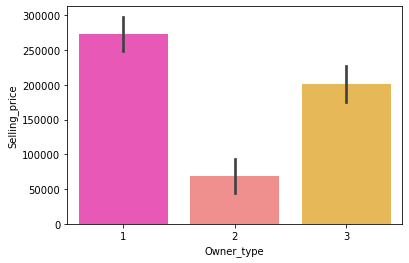

In [24]:
sns.barplot(x='Owner_type',y='Selling_price',data=vehicles,palette='spring')

It seems that the vehicles belonging to owner_type 1 have the highest selling price

2.Examining the selling price for manual and automatic vehicles

<AxesSubplot:xlabel='Transmission', ylabel='Selling_price'>

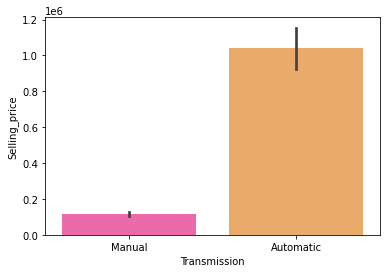

In [25]:
sns.barplot(x='Transmission',y='Selling_price',data=vehicles,palette='spring')

We can see tha automatic vehicles are found to have a large resale value in the market compared to manual transmission.

3.Examining the selling price based on different types of engine fuel

<AxesSubplot:xlabel='Fuel_type', ylabel='Selling_price'>

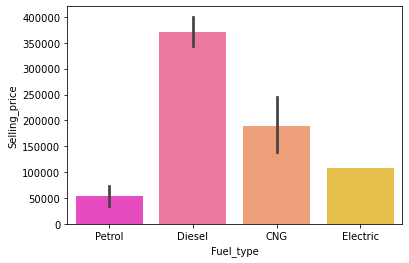

In [26]:
sns.barplot(x='Fuel_type',y='Selling_price',data=vehicles,palette='spring')

Diesel Engine Vehicles are found to have the highest selling price amongst Petrol and CNG engine vehicles

4.Examining of the selling price for a vehicle sold by a Dealer vs Individual

<AxesSubplot:xlabel='Seller_type', ylabel='Selling_price'>

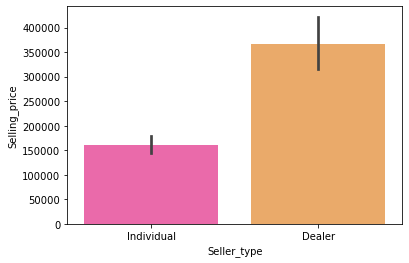

In [27]:
sns.barplot(x='Seller_type',y='Selling_price',data=vehicles,palette='spring')

Dealers can sell vehicles at a higher selling price than a general individual.

### Visualizing the relationship between Target Variable[Selling price] against Kms Driven,Present_Price and Vehicle age

1.Km driven

<Figure size 720x720 with 0 Axes>

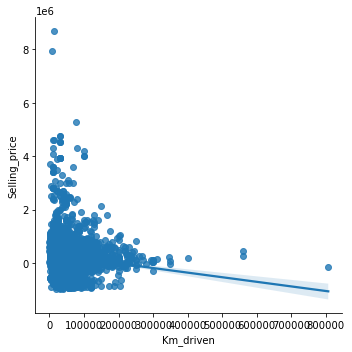

In [28]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Km_driven',y='Selling_price',data=vehicles)

The selling price is found to be higher for vehicles with less kms covered.

2.Present price

<Figure size 720x720 with 0 Axes>

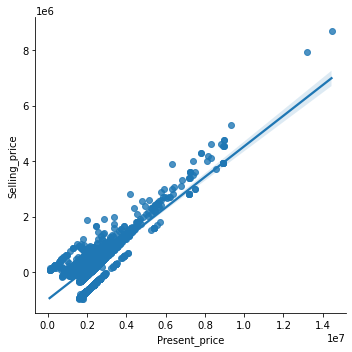

In [29]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Present_price',y='Selling_price',data=vehicles)

Selling Price tends to increase gradually with an increase in the Present Price of the vehicle.

3.Vehicle Age 

creating a new column 'Vehicle_Age' and storing the age of the vehicles to establish a direct relationship between the age and selling price

In [30]:
vehicles['Vehicle_Age']=2022- vehicles['Year']
vehicles.head(10)

,Name,Year,Selling_price,Present_price,Km_driven,Fuel_type,Seller_type,Transmission,Owner_type,Vehicle_Age
0,Maruti 800,2007,60000,90050.0,70000,Petrol,Individual,Manual,1,15
1,Maruti Wagon,2007,135000,2202550.0,50000,Petrol,Individual,Manual,1,15
3,Hyundai Verna,2012,600000,959950.0,100000,Diesel,Individual,Manual,1,10
4,Datsun RediGO,2017,250000,575050.0,46000,Petrol,Individual,Manual,1,5
5,Honda Amaze,2014,450000,675050.0,141000,Diesel,Individual,Manual,2,8
6,Maruti Alto,2007,140000,130050.0,125000,Petrol,Individual,Manual,1,15
7,Tata Indigo,2014,240000,360000.0,60000,Petrol,Individual,Manual,2,8
8,Hyundai Creta,2015,850000,1275000.0,25000,Petrol,Individual,Manual,1,7
9,Maruti Celerio,2017,365000,547500.0,78000,CNG,Individual,Manual,1,5
10,Chevrolet Sail,2015,260000,399000.0,35000,Petrol,Individual,Manual,1,7


<AxesSubplot:xlabel='Vehicle_Age', ylabel='Selling_price'>

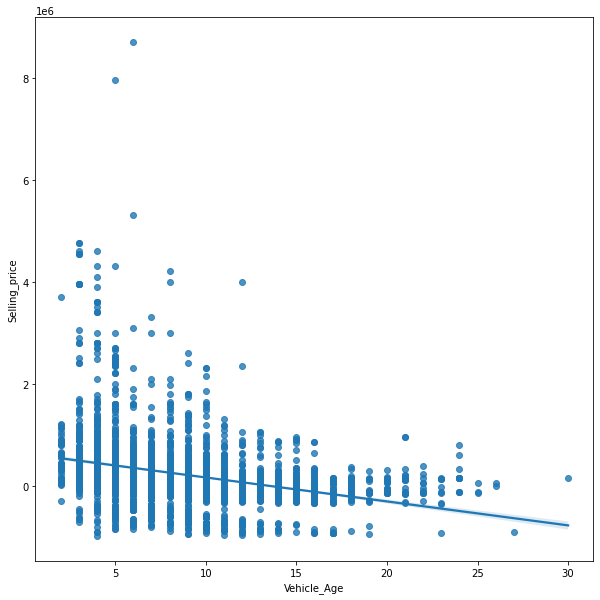

In [31]:
plt.figure(figsize=(10,10))
sns.regplot(x='Vehicle_Age',y='Selling_price',data=vehicles)

It seems the selling price decreases overall for older/ageing vehicles!

### Feature Engineering

We shall convert categorical features to numeric type

In [32]:
#using Pandas' built in function 'get_dummies()' to swiftly map the categorical values to integers like (0/1/2/3....)
vehicles=pd.get_dummies(vehicles,columns=['Fuel_type','Transmission','Seller_type'],drop_first=True)

#dropping the Year column since it becomes redundant and irrelevant after Vehicle_Age column
vehicles.drop(columns=['Year'],inplace=True)

#check out the dataset with new changes
vehicles.head()

,Name,Selling_price,Present_price,Km_driven,Owner_type,Vehicle_Age,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Petrol,Transmission_Manual,Seller_type_Individual
0,Maruti 800,60000,90050.0,70000,1,15,0,0,1,1,1
1,Maruti Wagon,135000,2202550.0,50000,1,15,0,0,1,1,1
3,Hyundai Verna,600000,959950.0,100000,1,10,1,0,0,1,1
4,Datsun RediGO,250000,575050.0,46000,1,5,0,0,1,1,1
5,Honda Amaze,450000,675050.0,141000,2,8,1,0,0,1,1


In [33]:
#Fuel attribute is now divided into three new attributes 
#Transmission attribute is mapped to Transmission_Manual where '1' denotes Manual and '0' Automatic.
#Seller_type attribute is mapped to Seller_type_individual where '1' denotes  Individual and '0' Dealer.

### Understanding and Visualizing Correlations amongst the features

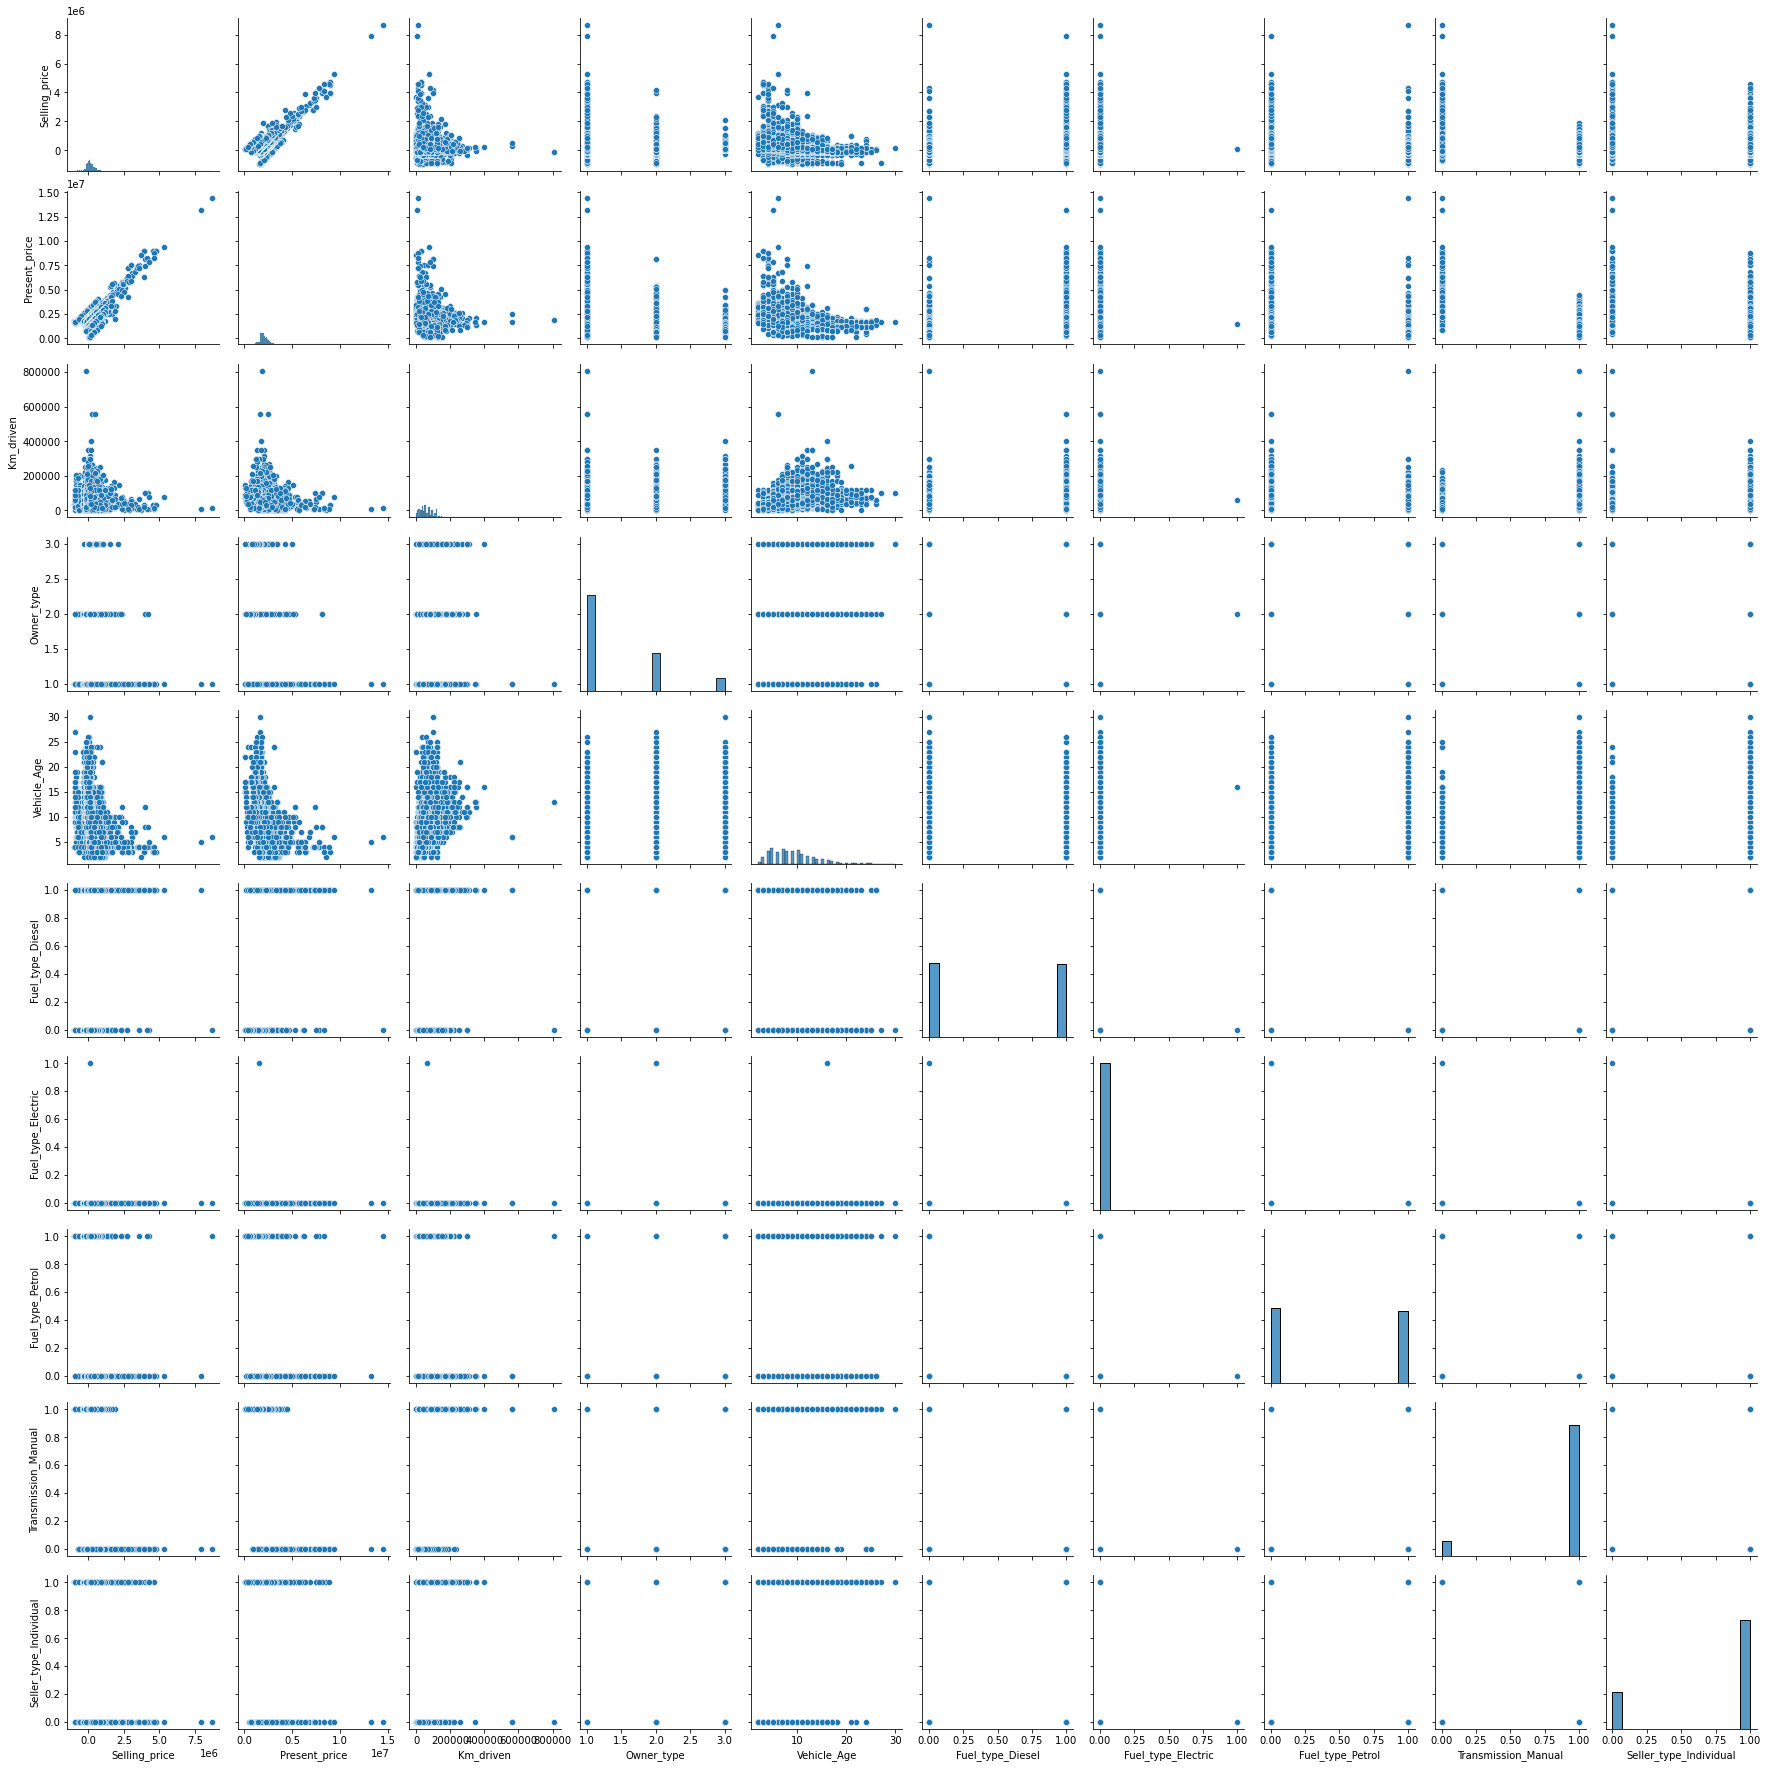

In [34]:
sns.pairplot(vehicles)

In [35]:
#The pair plot technique allows us to visualize distributions of individual numerical features, 
#as well as correlations/relationships between numerical features.
#Selling price seems to be considerably correlated with the Present Price feature.

### Correlation HeatMap

<AxesSubplot:>

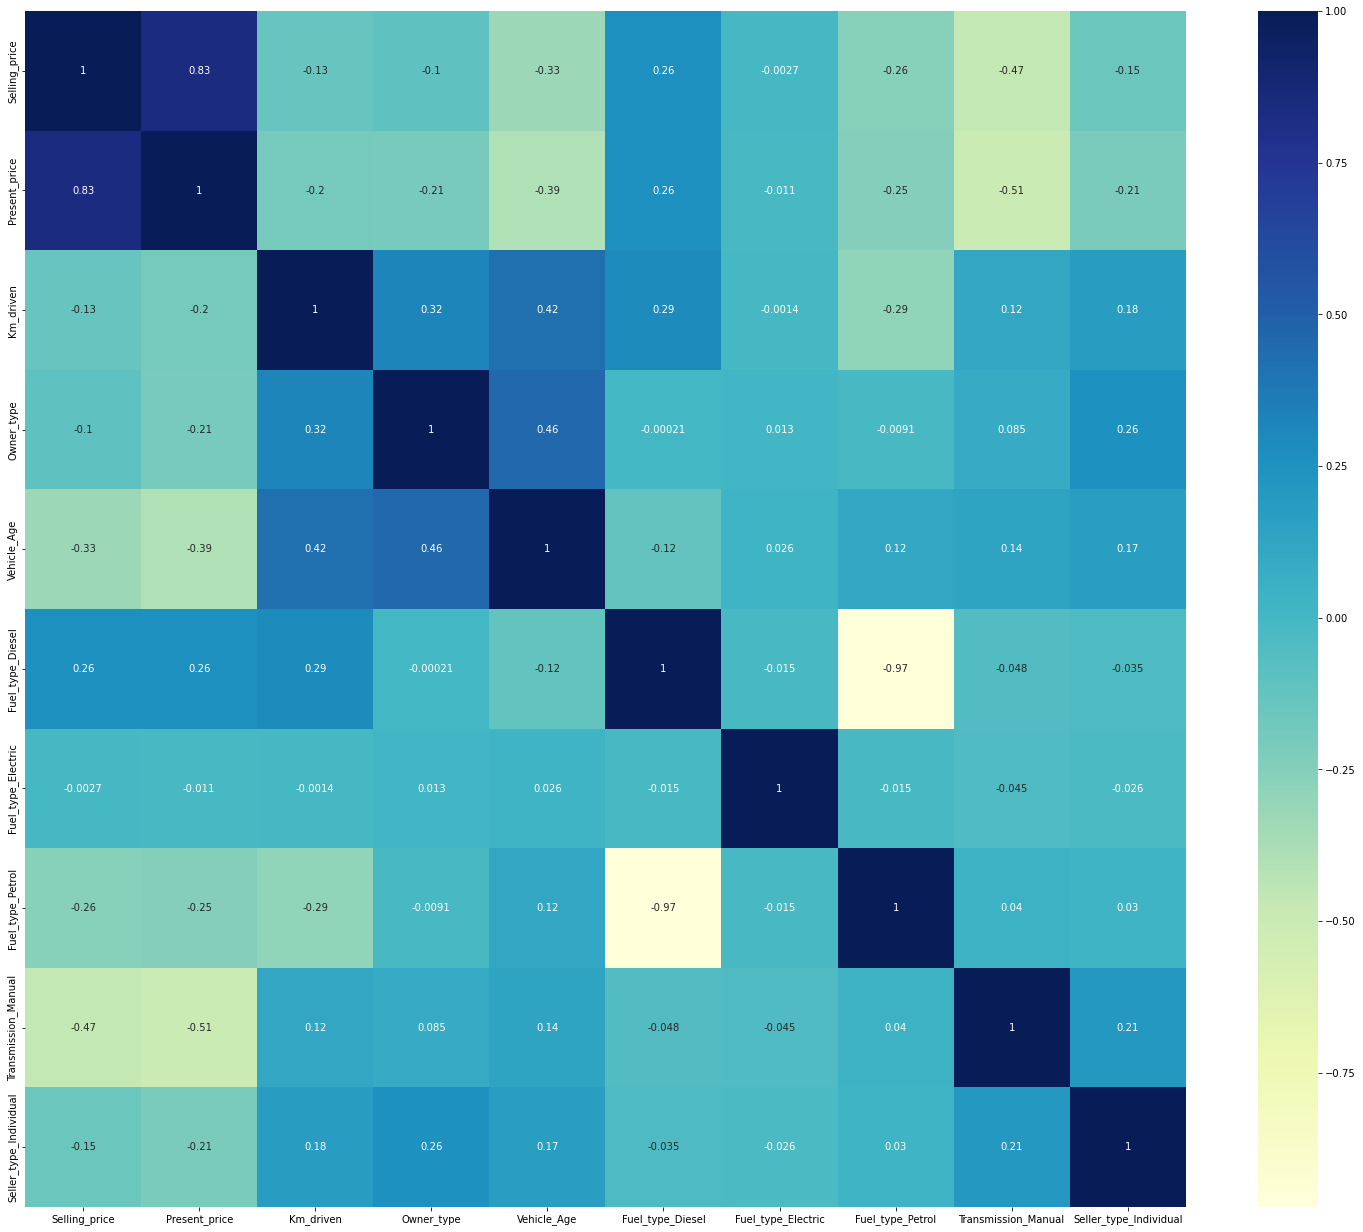

In [36]:
correlations = vehicles.corr()

indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(vehicles[indx].corr(),annot=True,cmap="YlGnBu")

### Training our Linear Regression Model

we will now begin to train out regression model. We will need to first split up our data into an vehicles_train array that contains the part of dataset used for training data, and a vehicles_test array used for test data.

1. Train Test Split

In [37]:
# We're splitting up our data set into groups called 'train' and 'test'
from sklearn.model_selection import train_test_split

np.random.seed(0)
vehicles_train,vehicles_test = train_test_split(vehicles, test_size=0.3, random_state=100)

# We'll perform feature scaling to ensure normalization of the data within a particular range.
#Sometimes, it also helps in speeding up the calculations in an algorithm.
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

#features we need to scale are assigned as a list.
var=['Selling_price','Present_price','Km_driven','Vehicle_Age']

#scaling the training data(fitting the parameters and transforming the values)
vehicles_train[var]=scaler.fit_transform(vehicles_train[var])

#transforming the test data.We avoid fitting the values to prevent data leakage!
vehicles_test[var]=scaler.transform(vehicles_test[var])

#We will toss out the Car_Name column from training and test data because it only has text info that the linear regression model can't use!

X_test=vehicles_test.drop(columns=['Name','Selling_price'],axis=1)
y_test=vehicles_test['Selling_price']

X_train=vehicles_train.drop(columns=['Name','Selling_price'],axis=1)
y_train=vehicles_train['Selling_price']

2. Creating and Training the Model

In [38]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

3. Model Evaluation

Evaluating the model by checking out it's coefficients and how we can interpret them.

In [39]:
# print the intercept of best-fit line
print(lm.intercept_)

0.30331645383511563


In [40]:
# temp here stores the numerical columns from the vehicles dataset that influence the prediction
temp=vehicles.drop(columns=['Name','Selling_price'])

coeff_df = pd.DataFrame(lm.coef_,temp.columns,columns=['Coefficient'])
coeff_df 

,Coefficient
Present_price,0.799375
Km_driven,-0.013227
Owner_type,0.114822
Vehicle_Age,-0.031834
Fuel_type_Diesel,-0.244675
Fuel_type_Electric,-0.077602
Fuel_type_Petrol,-0.347892
Transmission_Manual,-0.244454
Seller_type_Individual,0.056358


In [58]:
#Interpreting the coefficients:
#For numerical features:

#Holding all other features fixed, a 1 unit increase in Present_Price is associated with an increase of 0.799.
#Holding all other features fixed, a 1 unit increase in Kms_Driven is associated with a decrease of .013.
#Holding all other features fixed, a 1 unit increase in Vehicle_Age means decrease in 0.031.

4. Predictions from our Model

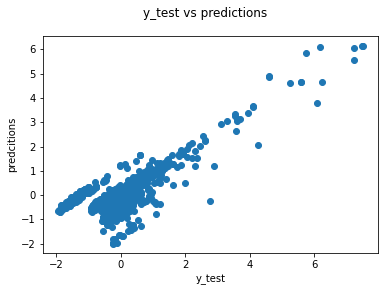

In [42]:
predictions=lm.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

Residual Histogram

C:\Users\tania\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Analysis')

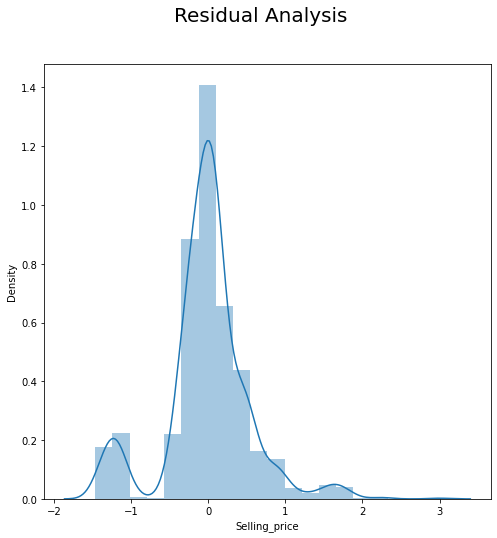

In [43]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((y_test-predictions),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)  

5. Regression Evaluation Metrics

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3669719379304863
MSE: 0.3116968614511122
RMSE: 0.558298183277639


In [45]:
R2 = metrics.r2_score(y_test,predictions)
R2

0.6740781241119012

### Implementing Advanced Regression(XGBoost Regression)

Core Imports

In [46]:
# Import xgboost ensemble model
import xgboost

#core import for hyperparamter tuning
from sklearn.model_selection import RandomizedSearchCV

#creates a xgbRegressor object
regressor=xgboost.XGBRegressor()

Tuning and Training the Model

In [47]:
#Hyperparamter_Tuning
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [48]:
# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

#train on the RandomSearchCv object to get best estimators
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=3,
                   param

In [49]:
#getting the best estimators
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
#getting the best params
random_cv.best_params_

{'n_estimators': 100,
 'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 0.25}

In [51]:
# reinitializing the regressor object with the best probable estimators
regressor=xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=np.nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
# fitting the xgbRegressor on our training data
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=1100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

XGBRegressor() Model Evaluation and Predictions

In [53]:
# fetching the predictions on our test data
predictions2=regressor.predict(X_test)

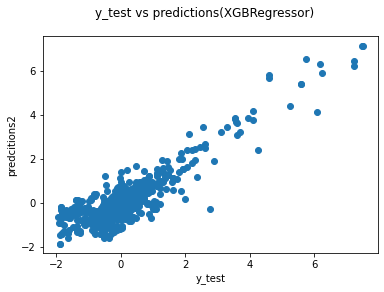

In [54]:
fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions(XGBRegressor)')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions2')
plt.scatter(y_test,predictions2)

C:\Users\tania\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Analysis')

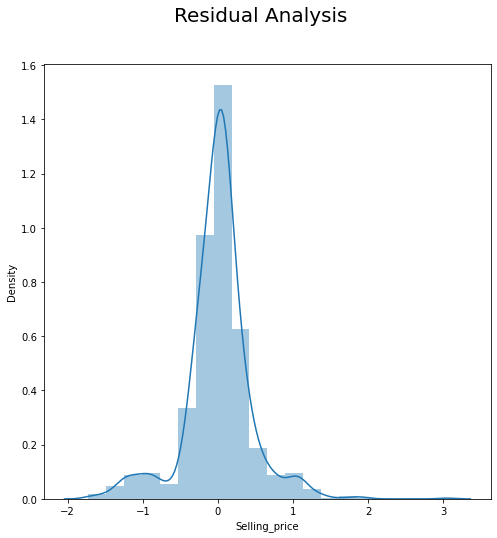

In [55]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((y_test-predictions2),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE: 0.29207747528755396
MSE: 0.19665535076598983
RMSE: 0.4434583980104445


In [57]:
R2 = metrics.r2_score(y_test,predictions2)
R2

0.7943698228891654